In [1]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from skimage import io
from scipy.ndimage import zoom

In [2]:
path = '../Data/qualitative_ellipsoids/'
name = 'cell_004.png'
inputpath = 'input_maxproj/'
convpath = 'noise_maxproj/psf_sigma_0.5_aspect_ratio_3.0_voxel_size_[1._0.3_0.3]_noise_poisson_snr=2.0/'
deconvpath = 'deconvolved_upsampled_maxproj/'
deconvpath2 = 'psf_sigma_0.5_aspect_ratio_3.0_voxel_size_[1._0.3_0.3]_noise_poisson_snr=2.0_voxel_size_[0.1_0.1_0.1]/'
comparepath = ['iterative_deconvolve_3d_detect=False_low=0.0_normalize=True_perform=True_terminate=0.1_wiener=1.0/',
               'iterative_deconvolve_3d_detect=False_low=2.0_normalize=True_perform=True_terminate=0.1_wiener=1.0/',
               'iterative_deconvolve_3d_detect=False_low=4.0_normalize=True_perform=True_terminate=0.1_wiener=1.0/',
               'iterative_deconvolve_3d_detect=False_low=6.0_normalize=True_perform=True_terminate=0.1_wiener=1.0/',]

In [3]:
stack1 = [io.imread(path + inputpath + name),
        io.imread(path + convpath + name)]
labels1 = ['input', 'convolved']
stack2 = []
labels2 = ['Low pass 0 px',
           'Low pass 2 px',
           'Low pass 4 px', 
           'Low pass 6 px']
for cpath in comparepath:
    stack2.append(io.imread(path + deconvpath + cpath + deconvpath2 + name))
pad_width = int((stack2[0].shape[1] - stack1[0].shape[1])/2)
stack1[0] = np.pad(stack1[0], pad_width)
print(stack1[0].shape, stack2[0].shape)

print(stack1[-1].shape)
stack1[-1] = zoom(stack1[-1], [1/0.3, 1])
print(stack1[-1].shape)

(284, 293) (380, 294)
(38, 98)
(127, 98)


/opt/anaconda3/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


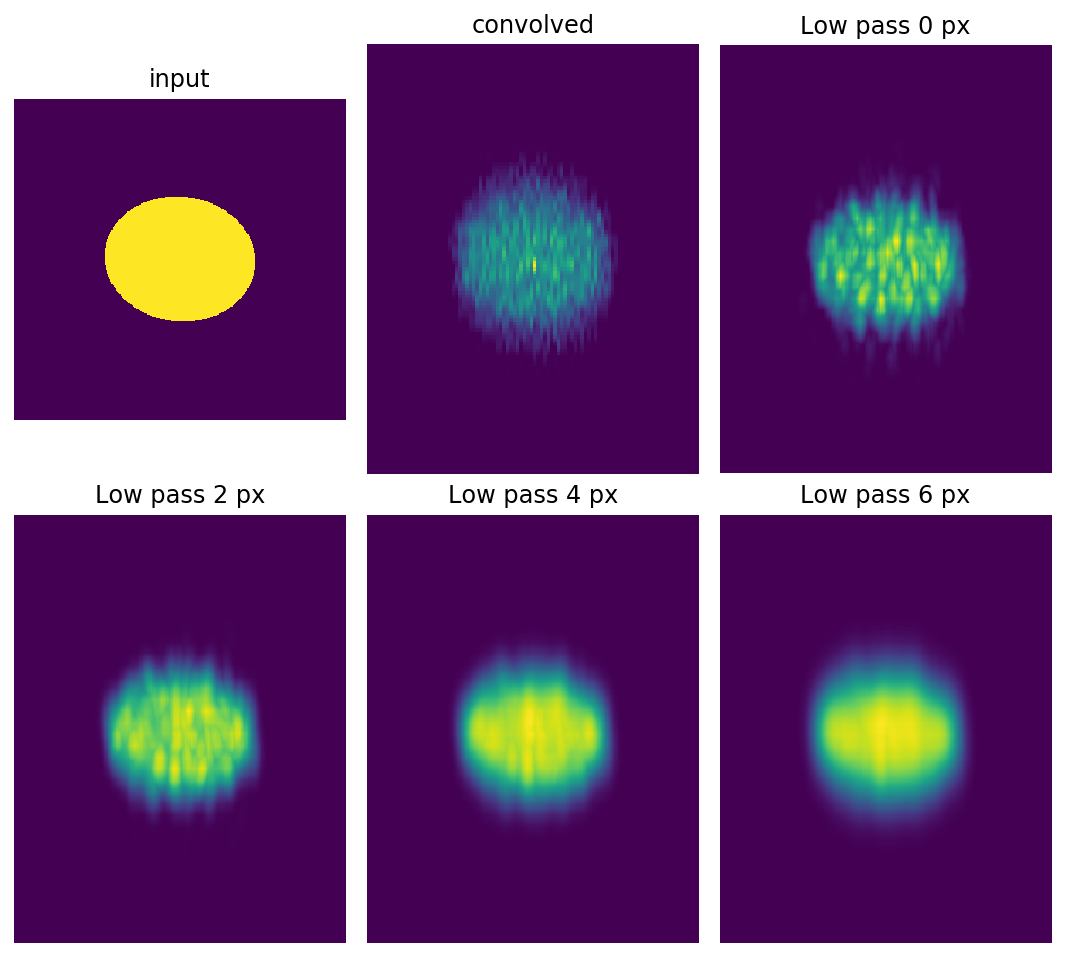

In [6]:
size = (7.5,9)
fig, axs = plt.subplots(2, 3, figsize=size)
for i in range(len(stack1)):
    plt.sca(axs[0,i])
    io.imshow(stack1[i], cmap='viridis')
    plt.axis('off')
    plt.title(labels1[i])
    
plt.sca(axs[0, 2])
io.imshow(stack2[0], cmap='viridis')
plt.axis('off')
plt.title(labels2[0])
    
    
for i in range(len(stack2)-1):
    plt.sca(axs[1, i])
    io.imshow(stack2[i+1], cmap='viridis')
    plt.axis('off')
    plt.title(labels2[i+1])
    
plt.tight_layout()
plt.savefig('plot_low_pass.svg', dpi=300)
